In [1]:
import pandas as pd
import numpy as np
from scipy.fftpack import fft
import re

import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython
import IPython.display as ipd
# system
import sys
import os
from os.path import isdir, isfile, join
import pickle

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# Retrieve train and test cvs files
path = 'common-voice\cv-valid-train.csv'
X = pd.read_csv(path, sep=',', encoding='ascii')
path = 'common-voice\cv-valid-test.csv'
y = pd.read_csv(path, sep=',', encoding='ascii')

In [3]:
X.head(1)

,filename,text,up_votes,down_votes,age,gender,accent,duration
0,cv-valid-train/sample-000000.mp3,learn to recognize omens and follow them the o...,1,0,NaN,NaN,NaN,NaN


In [4]:
y.head(1)

,filename,text,up_votes,down_votes,age,gender,accent,duration
0,cv-valid-test/sample-000000.mp3,without the dataset the article is useless,1,0,NaN,NaN,NaN,NaN


## Retrieve audio data

In [ ]:
# 
def get_audio_data(directory):
    for file in os.listdir(directory):
        if (X_data_2['filename'] == file).sum() >0:
            continue
        audio_files_dict={}
        if isfile(join(directory, file)):
            samples, sample_rate = librosa.load(directory+'\\'+file, sr=16000)
            audio_files_dict['filename'] = file
            audio_files_dict['samples'] = samples
            audio_files.append(audio_files_dict)
    return audio_files

In [ ]:
audio_files=[]
train = get_audio_data('common-voice/cv-valid-train/cv-valid-train')

In [ ]:
# with open('CommonVoice_train', 'wb') as fp:
#     pickle.dump(train, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [5]:
train_1 = pickle.load(open('CommonVoice_train_10k', 'rb'))

In [6]:
train_2 = pickle.load(open('CommonVoice_train_80k_p1', 'rb'))

In [7]:
train_3 = pickle.load(open('CommonVoice_train_80k_p2', 'rb'))

In [8]:
train_4 = pickle.load(open('CommonVoice_train_80k_p3', 'rb'))

In [9]:
train_5 = pickle.load(open('CommonVoice_train_80k_p4', 'rb'))

In [10]:
train_6 = pickle.load(open('CommonVoice_train_80k_p5', 'rb'))

In [11]:
train_7 = pickle.load(open('CommonVoice_train_80k_p6', 'rb'))

In [12]:
train_8 = pickle.load(open('CommonVoice_train_80k_p7', 'rb'))

In [13]:
train_9 = pickle.load(open('CommonVoice_train_80k_p8', 'rb'))

In [14]:
train_10 = pickle.load(open('CommonVoice_train_80k_p9', 'rb'))

In [15]:
train = pd.concat([train_1, train_2, train_3, train_4, train_5, train_6, train_7, train_8, train_9, train_10])
train

,filename,samples
0,sample-000000.mp3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,sample-000001.mp3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,sample-000002.mp3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,sample-000003.mp3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,sample-000004.mp3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...
70478,sample-080499.mp3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
70479,sample-080500.mp3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
70480,sample-080501.mp3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
70481,sample-080502.mp3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [16]:
# delete these files to unload them form the memory (RAM)
del train_1, train_2, train_3, train_4, train_5, train_6, train_7, train_8, train_9, train_10

In [18]:
audio_files=[]
test = get_audio_data('common-voice/cv-valid-test/cv-valid-test')

In [ ]:
# with open('CommonVoice_test', 'wb') as fp:
#     pickle.dump(test, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [19]:
test = pickle.load(open('CommonVoice_test', 'rb'))

## Join audio data with the cvs files based on the filename

In [20]:
train

,filename,samples
0,sample-000000.mp3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,sample-000001.mp3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,sample-000002.mp3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,sample-000003.mp3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,sample-000004.mp3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...
70478,sample-080499.mp3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
70479,sample-080500.mp3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
70480,sample-080501.mp3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
70481,sample-080502.mp3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [21]:
X['filename']= X['filename'].apply(lambda x: re.split(r"(/)", x, re.I)[2])
y['filename']= y['filename'].apply(lambda x: re.split(r"(/)", x, re.I)[2])

In [22]:
train_data = pd.merge(X, train, on ='filename', how='inner')
X_train = train_data['samples']
y_train = train_data['text']

test_data = pd.merge(y, test, on ='filename', how='inner')
X_test = test_data['samples']
y_test = test_data['text']

In [18]:
X_train_len = pickle.load(open('X_train_len', 'rb'))

In [24]:
train.columns

Index(['filename', 'samples'], dtype='object')

In [26]:
train_len=[]
for sam in train['samples']:
    train_len.append(len(sam))

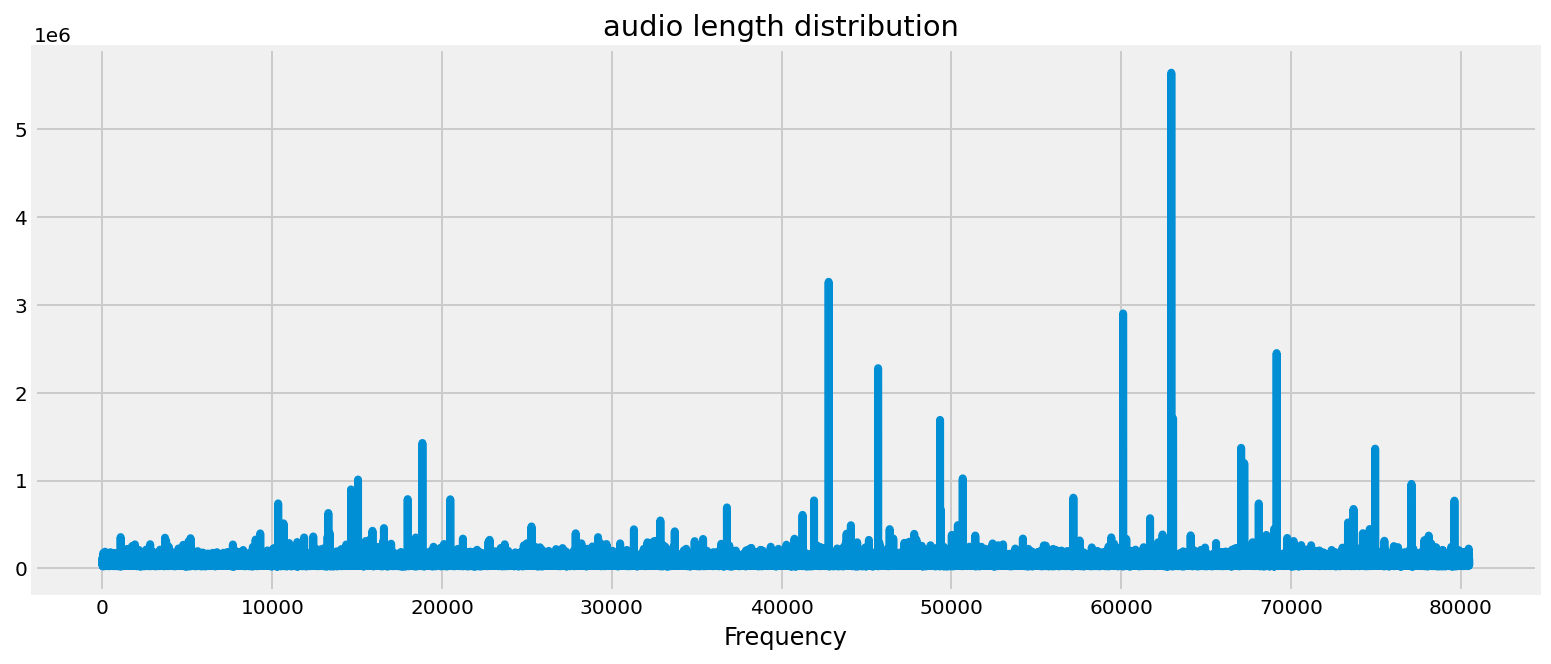

In [27]:
plt.figure(figsize=(12, 5))
plt.title('audio length distribution ')
plt.plot(train_len)
plt.show()

In [28]:
for i in range(len(train_len)):
    train_len[i]=train_len[i]/16000

In [30]:
hour= sum(train_len)/60/60
print('The total number of hours in this subset of the dataset {}' .format(hour))

The total number of hours in this subset of the dataset 99.88640666666612


In [31]:
train.reset_index(drop=True, inplace=True)

In [35]:
# rand = np.random.randint(0, len(words))
ipd.Audio(train['samples'][10], rate=16000)

## Text cleaning

In [ ]:
def clean_text(text):
    '''Clean text by removing unnecessary characters and altering the format of words.'''
    text = text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "that is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"n'", "ng", text)
    text = re.sub(r"'bout", "about", text)
    text = re.sub(r"'til", "until", text)
    text = re.sub(r" ", "_", text)
    text = re.sub(r"[-()\"'#/@;:<>{}`+=~|.!?,]", "", text)
    return text

# Feature Engineering



### Paraphrase 

The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10-20) which concisely describe the overall shape of a spectral envelope.

#### Wikipedia:
The difference between the cepstrum and the mel-frequency cepstrum is that in the MFC, the frequency bands are equally spaced on the mel scale, which approximates the human auditory system's response more closely than the linearly-spaced frequency bands used in the normal cepstrum.

MFCCs are commonly derived as follows:
Take the Fourier transform of (a windowed excerpt of) a signal.
Map the powers of the spectrum obtained above onto the mel scale, using triangular overlapping windows.
Take the logs of the powers at each of the mel frequencies.
Take the discrete cosine transform of the list of mel log powers, as if it were a signal.
The MFCCs are the amplitudes of the resulting spectrum.



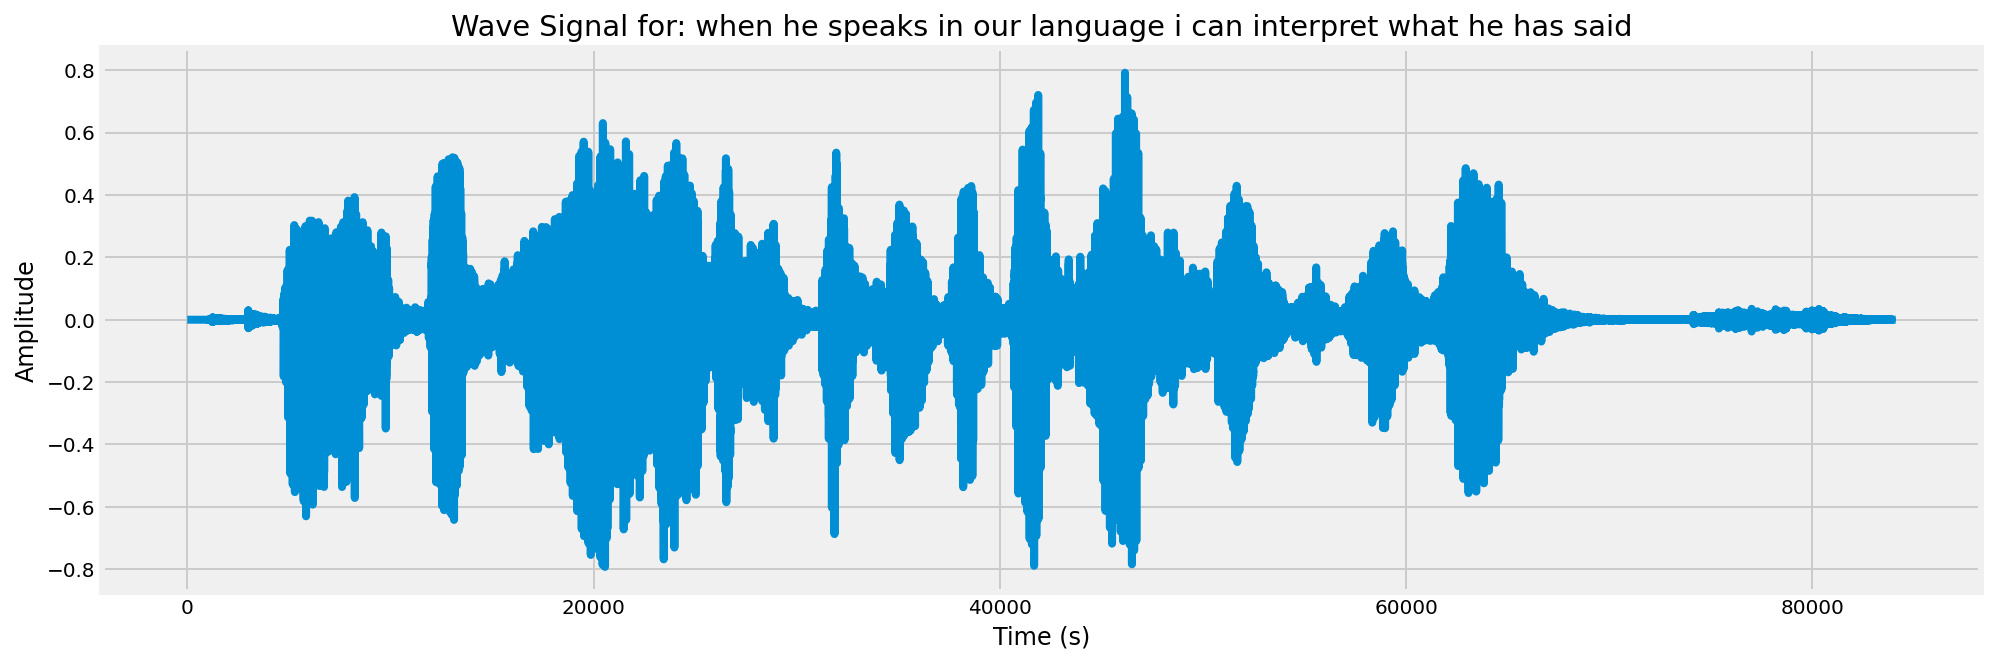

In [83]:
plt.figure(figsize=(15, 5))
plt.plot(train['samples'][9])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Wave Signal for: {}' .format(X['text'][9]))
plt.show()

## Investigating Mel-Frequency Cepstral Coefficients (MFCC)

In [64]:
def plot_mfcc(samples, sample_rate, vlines):
    melspectrogram = librosa.feature.melspectrogram(samples.astype(float), sr=sample_rate, n_mels=20)
    power_to_db = librosa.power_to_db(melspectrogram, ref=np.max)
    mfcc = librosa.feature.mfcc(S=power_to_db, n_mfcc=20)
    plt.figure(figsize=(12, 5))
    librosa.display.specshow(mfcc)
    if vlines:
        for axv in mfcc[1]:
            plt.axvline(axv)
    plt.title('Mel-Frequency Cepstral Coefficients (MFCC)')
    plt.ylabel('MFCC coefficients')
    plt.xlabel('Time')
    plt.colorbar()
    plt.tight_layout()

MFCC plot for the sentence: "in spite of this i still believed that there were men in mars" 


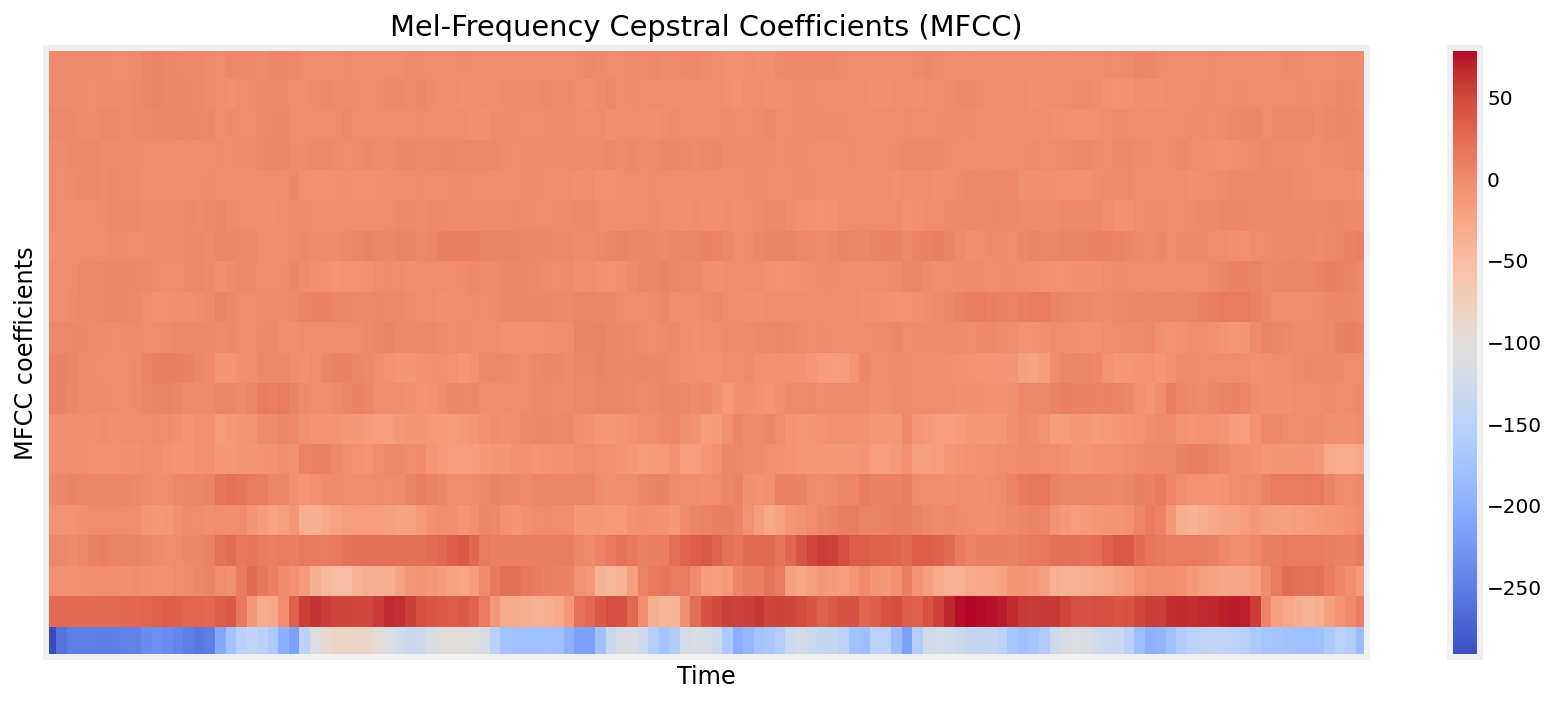

In [65]:
rand = np.random.randint(0, len(train_data))
samples = train_data['samples'][rand]
print('MFCC plot for the sentence: \"{}\" ' .format(train_data['text'][rand]))
plot_mfcc(samples, 16000, False)

## Checking the frequency of the audio files
 
The Fast Fourier transform is to show the range of frequency for each audio (randomly)

In [66]:
def fft_fun(audio_sample, sampling_rate):
    n=len(audio_sample)
    frequency = np.fft.rfftfreq(n, d=1/sampling_rate)
    vals = abs(np.fft.rfft(audio_sample)/n)
    return frequency, vals

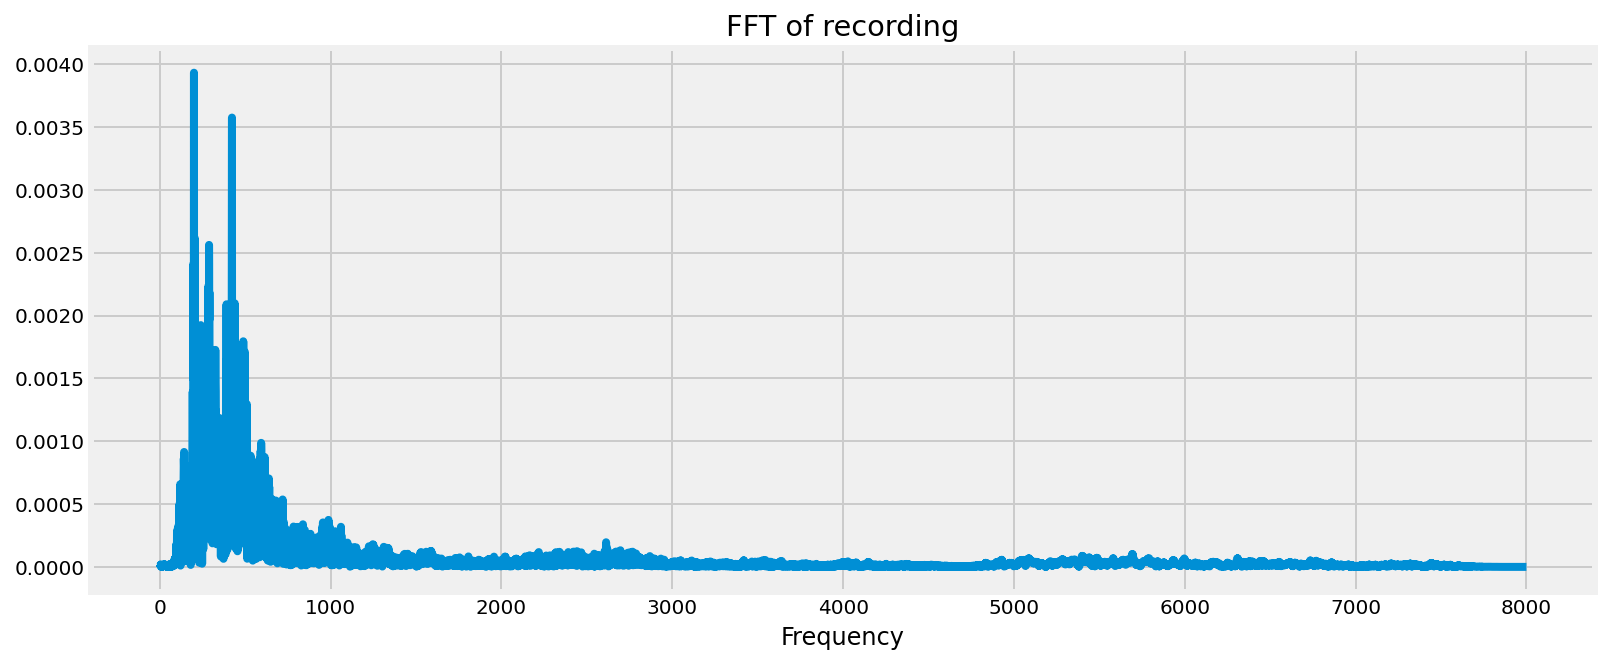

In [67]:
rand = np.random.randint(0, len(train_data))
samples = train_data['samples'][rand]
frequency, vals = fft_fun(samples, 16000)
plt.figure(figsize=(12, 5))
plt.title('FFT of recording')
plt.plot(frequency, vals)
plt.xlabel('Frequency')
plt.show()

## Converting audio files to MFCC

In [ ]:
train_lst =[]
for sample in train_data['samples']:
    mfcc = librosa.feature.mfcc(y=sample, sr=16000)
    train_lst.append(mfcc.T)

In [ ]:
# a function to reshape the data to suit the input shape of lstm model
def reshape_data(data, n_samples, n_mfcc):
    t= max(len(x) for x in data)
    XX_train =np.zeros((n_samples, t, n_mfcc))
    # for each sample 
    for row in range(len(data)):
        # for each tmiestep 
        for t in range(len(data[row])):
            # for each feature
            for ft in range(len(data[row][t])):
                XX_train[row][t][ft] = data[row][t][ft]
    return XX_train

In [ ]:
X_train = reshape_data(train_lst, len(train_lst), len(train_lst[0][0]))
X_train.shape